## Final Assessment

### 3.1 Import Library

In [1]:
import time
start_time = time.time()

In [2]:
import os
import copy
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import seaborn as sn
import scipy.stats as sps
import matplotlib
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve

from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/zmy/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


### 3.2 Pulling Data

In [3]:
df = pd.read_csv(os.path.join('data','carbon_all.csv'), low_memory=False)

In [4]:
df.columns

Index(['pm25', 'co', 'dew', 'humidity', 'no2', 'o3', 'pm10', 'pressure', 'so2',
       'temperature', 'wind-gust', 'wind-speed', 'year_month', 'Date'],
      dtype='object')

In [5]:
df=df.rename(columns={"wind-gust":"wind_gust",
                        "wind-speed": "wind_speed",
                        })

In [6]:
df.describe()

,pm25,co,dew,humidity,no2,o3,pm10,pressure,so2,temperature,wind_gust,wind_speed
count,941.0000,938.0000,915.0000,921.0000,941.0000,941.0000,941.0000,921.0000,941.0000,921.0000,921.0000,921.0000
mean,39.0414,5.4584,7.1552,74.7582,13.3460,15.1880,15.7673,"1,014.6743",1.8313,12.1504,7.7782,3.4669
std,17.9325,3.1392,4.7279,11.3737,6.1711,6.9065,7.4123,11.2672,1.1886,5.4774,3.9754,1.8453
min,15.0000,0.2000,-9.0000,44.8000,2.7000,0.7000,5.0000,972.5000,0.2000,-1.6000,1.4000,0.8000
25%,26.0000,3.0000,4.0000,66.0000,8.7000,10.6000,11.0000,"1,007.8000",1.1000,8.3000,4.7000,2.1000
50%,33.0000,4.6000,7.0000,75.5000,11.9000,15.4000,14.0000,"1,015.5000",1.5000,11.4000,7.0000,3.0000
75%,46.0000,8.2000,11.0000,84.5000,16.7000,20.1000,18.0000,"1,022.5000",2.2000,16.6000,10.0000,4.3000
max,133.0000,15.2000,18.0000,95.0000,42.4000,38.8000,53.0000,"1,047.9000",8.2000,28.7000,28.6000,12.3000


In [7]:
df.head(5)

,pm25,co,dew,humidity,no2,o3,pm10,pressure,so2,temperature,wind_gust,wind_speed,year_month,Date
0,30,7.6000,4.5000,76.0000,12.0000,14.9000,11,"1,033.0000",0.9000,9.0000,6.2000,2.5000,Jan-19,01/01/2019
1,33,10.0000,1.0000,75.0000,16.5000,14.2000,14,"1,041.4000",0.6000,5.5000,5.1000,2.2000,Jan-19,02/01/2019
2,42,10.6000,1.0000,74.4000,21.3000,10.7000,15,"1,041.6000",0.7000,5.0000,2.9000,1.2000,Jan-19,03/01/2019
3,72,11.8000,1.0000,76.0000,25.2000,4.3000,28,"1,041.0000",1.3000,3.3000,3.1000,1.5000,Jan-19,04/01/2019
4,63,10.4000,1.0000,76.6000,20.6000,8.4000,22,"1,037.6000",1.1000,5.0000,5.6000,2.8000,Jan-19,05/01/2019


In [8]:
select= [x for x in ['pm25','so2','pressure',  'temperature', 'wind_gust', 'wind_speed','dew', 'humidity']]

#### 有缺失值，pm25缺失的话就去掉一整条记录，其余缺失值采用插值法（取前一个数）填充,结果显示pm25没有缺失，则只需要插补

In [9]:
df.isnull().any()

pm25           False
co              True
dew             True
humidity        True
no2            False
o3             False
pm10           False
pressure        True
so2            False
temperature     True
wind_gust       True
wind_speed      True
year_month     False
Date           False
dtype: bool

In [10]:
selection = [x for x in df.columns.values if x.startswith('date')]
select= [x for x in df.columns.values]

for c in select:
    if c not in selection:
        #df[c] = df[c].apply(lambda x: int(x))
        #df[c] = df[c].fillna(method='pad')
        df[c] = df[c].interpolate(method='linear', limit_direction='forward', axis=0)

In [11]:
df.isnull().any()

pm25           False
co             False
dew            False
humidity       False
no2            False
o3             False
pm10           False
pressure       False
so2            False
temperature    False
wind_gust      False
wind_speed     False
year_month     False
Date           False
dtype: bool

In [12]:
df.head(5)

,pm25,co,dew,humidity,no2,o3,pm10,pressure,so2,temperature,wind_gust,wind_speed,year_month,Date
0,30,7.6000,4.5000,76.0000,12.0000,14.9000,11,"1,033.0000",0.9000,9.0000,6.2000,2.5000,Jan-19,01/01/2019
1,33,10.0000,1.0000,75.0000,16.5000,14.2000,14,"1,041.4000",0.6000,5.5000,5.1000,2.2000,Jan-19,02/01/2019
2,42,10.6000,1.0000,74.4000,21.3000,10.7000,15,"1,041.6000",0.7000,5.0000,2.9000,1.2000,Jan-19,03/01/2019
3,72,11.8000,1.0000,76.0000,25.2000,4.3000,28,"1,041.0000",1.3000,3.3000,3.1000,1.5000,Jan-19,04/01/2019
4,63,10.4000,1.0000,76.6000,20.6000,8.4000,22,"1,037.6000",1.1000,5.0000,5.6000,2.8000,Jan-19,05/01/2019


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pm25         941 non-null    int64  
 1   co           941 non-null    float64
 2   dew          941 non-null    float64
 3   humidity     941 non-null    float64
 4   no2          941 non-null    float64
 5   o3           941 non-null    float64
 6   pm10         941 non-null    int64  
 7   pressure     941 non-null    float64
 8   so2          941 non-null    float64
 9   temperature  941 non-null    float64
 10  wind_gust    941 non-null    float64
 11  wind_speed   941 non-null    float64
 12  year_month   941 non-null    object 
 13  Date         941 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 103.0+ KB


In [14]:
df.Date = pd.to_datetime(df.Date)
df['year'],df['quarter'],df['month'],df['day'] = df.Date.dt.year,df.Date.dt.quarter, df.Date.dt.month, df.Date.dt.day

In [15]:
df_pre = df[df['Date']<'2020-03-24']

In [16]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 701
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pm25         447 non-null    int64         
 1   co           447 non-null    float64       
 2   dew          447 non-null    float64       
 3   humidity     447 non-null    float64       
 4   no2          447 non-null    float64       
 5   o3           447 non-null    float64       
 6   pm10         447 non-null    int64         
 7   pressure     447 non-null    float64       
 8   so2          447 non-null    float64       
 9   temperature  447 non-null    float64       
 10  wind_gust    447 non-null    float64       
 11  wind_speed   447 non-null    float64       
 12  year_month   447 non-null    object        
 13  Date         447 non-null    datetime64[ns]
 14  year         447 non-null    int64         
 15  quarter      447 non-null    int64         
 16  month   

In [17]:
df_lock = df[df['Date']>='2020-03-24']

In [18]:
df_lock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 367 to 940
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pm25         494 non-null    int64         
 1   co           494 non-null    float64       
 2   dew          494 non-null    float64       
 3   humidity     494 non-null    float64       
 4   no2          494 non-null    float64       
 5   o3           494 non-null    float64       
 6   pm10         494 non-null    int64         
 7   pressure     494 non-null    float64       
 8   so2          494 non-null    float64       
 9   temperature  494 non-null    float64       
 10  wind_gust    494 non-null    float64       
 11  wind_speed   494 non-null    float64       
 12  year_month   494 non-null    object        
 13  Date         494 non-null    datetime64[ns]
 14  year         494 non-null    int64         
 15  quarter      494 non-null    int64         
 16  month 

In [183]:
df_metrix = df_pre.loc[:,['pm25', 'pressure',  'temperature', 'wind_gust', 'wind_speed','dew', 'humidity']]

In [184]:
for obs in range(1,31):
    df_metrix["T_" + str(obs)] = df_metrix.pm25.shift(obs)
df_metrix.fillna(0.00,inplace=True)
df_metrix.head()

,pm25,pressure,temperature,wind_gust,wind_speed,dew,humidity,T_1,T_2,T_3,...,T_21,T_22,T_23,T_24,T_25,T_26,T_27,T_28,T_29,T_30
0,30,"1,033.0000",9.0000,6.2000,2.5000,4.5000,76.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,33,"1,041.4000",5.5000,5.1000,2.2000,1.0000,75.0000,30.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,42,"1,041.6000",5.0000,2.9000,1.2000,1.0000,74.4000,33.0000,30.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,72,"1,041.0000",3.3000,3.1000,1.5000,1.0000,76.0000,42.0000,33.0000,30.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,63,"1,037.6000",5.0000,5.6000,2.8000,1.0000,76.6000,72.0000,42.0000,33.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [185]:
df_pre_metrix = df_pre.loc[:,['pm25','co',  'no2', 'o3',  'so2', 'pressure',  'temperature', 'wind_gust', 'wind_speed','dew', 'humidity']]

In [186]:
df_pre_metrix['pm25'] = np.log(df_pre_metrix['pm25'])

In [253]:
df_lock_metrix = df_lock.loc[:,[ 'pm25','co',  'no2', 'o3',  'so2','pressure',  'temperature', 'wind_gust', 'wind_speed','dew', 'humidity']]

In [254]:
df_lock_metrix['pm25'] = np.log(df_lock_metrix['pm25'])

In [189]:
df_metrix.columns

Index(['pm25', 'pressure', 'temperature', 'wind_gust', 'wind_speed', 'dew',
       'humidity', 'T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7', 'T_8',
       'T_9', 'T_10', 'T_11', 'T_12', 'T_13', 'T_14', 'T_15', 'T_16', 'T_17',
       'T_18', 'T_19', 'T_20', 'T_21', 'T_22', 'T_23', 'T_24', 'T_25', 'T_26',
       'T_27', 'T_28', 'T_29', 'T_30'],
      dtype='object')

In [190]:
df_pre_dl = df_metrix.loc[:,['pm25', 'pressure',  'temperature', 'wind_gust', 'wind_speed','dew', 'humidity','T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7', 'T_8',
       'T_9', 'T_10', 'T_11', 'T_12', 'T_13', 'T_14', 'T_15', 'T_16', 'T_17',
       'T_18', 'T_19', 'T_20', 'T_21', 'T_22', 'T_23', 'T_24', 'T_25', 'T_26',
       'T_27', 'T_28', 'T_29', 'T_30']]

In [191]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,2))
#df_pre_metrix = [[]]
df_pre_dl[['pm25', 'pressure',  'temperature', 'wind_gust', 'wind_speed','dew', 'humidity','T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7', 'T_8',
       'T_9', 'T_10', 'T_11', 'T_12', 'T_13', 'T_14', 'T_15', 'T_16', 'T_17',
       'T_18', 'T_19', 'T_20', 'T_21', 'T_22', 'T_23', 'T_24', 'T_25', 'T_26',
       'T_27', 'T_28', 'T_29', 'T_30']] = scaler.fit_transform(df_metrix[['pm25', 'pressure',  'temperature', 'wind_gust', 'wind_speed','dew', 'humidity','T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7', 'T_8',
       'T_9', 'T_10', 'T_11', 'T_12', 'T_13', 'T_14', 'T_15', 'T_16', 'T_17',
       'T_18', 'T_19', 'T_20', 'T_21', 'T_22', 'T_23', 'T_24', 'T_25', 'T_26',
       'T_27', 'T_28', 'T_29', 'T_30']]);


In [192]:
df_pre_dl.head()

,pm25,pressure,temperature,wind_gust,wind_speed,dew,humidity,T_1,T_2,T_3,...,T_21,T_22,T_23,T_24,T_25,T_26,T_27,T_28,T_29,T_30
0,1.1197,1.7831,1.2810,1.1924,1.1565,1.2973,1.6341,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.1453,1.9054,1.1533,1.1483,1.1271,1.1081,1.6138,1.2256,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.2222,1.9083,1.1350,1.0601,1.0293,1.1081,1.6016,1.2481,1.2256,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.4786,1.8996,1.0730,1.0681,1.0587,1.1081,1.6341,1.3158,1.2481,1.2256,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.4017,1.8501,1.1350,1.1683,1.1858,1.1081,1.6463,1.5414,1.3158,1.2481,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [193]:
df_pre_dl.describe()

,pm25,pressure,temperature,wind_gust,wind_speed,dew,humidity,T_1,T_2,T_3,...,T_21,T_22,T_23,T_24,T_25,T_26,T_27,T_28,T_29,T_30
count,447.0000,447.0000,447.0000,447.0000,447.0000,447.0000,447.0000,447.0000,447.0000,447.0000,...,447.0000,447.0000,447.0000,447.0000,447.0000,447.0000,447.0000,447.0000,447.0000,447.0000
mean,1.2029,1.5008,1.3895,1.2686,1.2529,1.4444,1.5852,1.2982,1.2973,1.2968,...,1.2878,1.2872,1.2868,1.2864,1.2859,1.2855,1.2849,1.2841,1.2834,1.2829
std,0.1652,0.1762,0.1900,0.1915,0.2054,0.2307,0.2171,0.1460,0.1466,0.1472,...,0.1575,0.1581,0.1586,0.1591,0.1596,0.1601,0.1607,0.1612,0.1618,0.1623
min,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
25%,1.0940,1.3785,1.2546,1.1283,1.1076,1.2703,1.4309,1.1992,1.1955,1.1955,...,1.1880,1.1880,1.1880,1.1880,1.1880,1.1880,1.1880,1.1880,1.1880,1.1880
50%,1.1453,1.5066,1.3577,1.2285,1.1858,1.4324,1.6077,1.2481,1.2481,1.2481,...,1.2481,1.2481,1.2481,1.2481,1.2481,1.2481,1.2406,1.2406,1.2406,1.2406
75%,1.2564,1.6230,1.5401,1.3447,1.3423,1.6216,1.7561,1.3459,1.3459,1.3459,...,1.3459,1.3459,1.3459,1.3459,1.3459,1.3459,1.3459,1.3459,1.3459,1.3459
max,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,...,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000


In [194]:
df_pre_dl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 701
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pm25         447 non-null    float64
 1   pressure     447 non-null    float64
 2   temperature  447 non-null    float64
 3   wind_gust    447 non-null    float64
 4   wind_speed   447 non-null    float64
 5   dew          447 non-null    float64
 6   humidity     447 non-null    float64
 7   T_1          447 non-null    float64
 8   T_2          447 non-null    float64
 9   T_3          447 non-null    float64
 10  T_4          447 non-null    float64
 11  T_5          447 non-null    float64
 12  T_6          447 non-null    float64
 13  T_7          447 non-null    float64
 14  T_8          447 non-null    float64
 15  T_9          447 non-null    float64
 16  T_10         447 non-null    float64
 17  T_11         447 non-null    float64
 18  T_12         447 non-null    float64
 19  T_13    

## Split the Date

In [195]:
df_pre_dl.shape

(447, 37)

In [196]:
def load_data(dataframe):
    row = round(0.8 * len(dataframe))
    #train = result[:int(row), :]
    x = dataframe.iloc[:, 1:]
    y = dataframe.iloc[:, 0]
    x_train = x[0:int(row)]
    y_train = y[0:int(row)]
    x_test = x[int(row):]
    y_test = y[int(row):]

    return [x_train, y_train, x_test, y_test]

In [197]:

X_train, y_train, X_test, y_test = load_data(df_pre_dl[::-1])
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (358, 36)
y_train (358,)
X_test (89, 36)
y_test (89,)


/Users/zmy/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/zmy/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/zmy/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  after removing the cwd from sys.path.


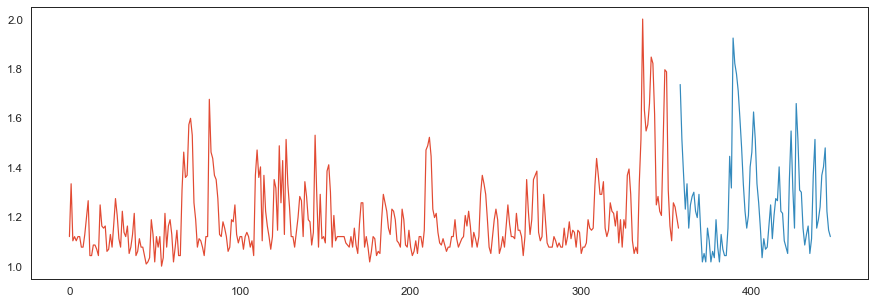

In [198]:
plt.figure(figsize=(15,5))
plt.plot(range(len(y_train)), y_train)
plt.plot(range(len(y_train), len(y_test) + len(y_train)), y_test);
plt.savefig('seg.png', dpi=300, frameon=False) 

## Regressor

In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [200]:
def MAPError(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((np.abs(y_true - y_pred)) / (y_true)) * 100

In [201]:
benchmark_model = LinearRegression() #object of class LinearRegression

start = time.time()
benchmark_model.fit(X_train, y_train) #Fit object to training set
end = time.time()
y_pred=benchmark_model.predict(X_test)
print("Classifier fitted in {:.2f} seconds".format(end-start))
print("Score on Training data : {:.2f}%".format(benchmark_model.score(X_train, y_train) * 100))
print("Score on Testing data : {:.2f}%".format(benchmark_model.score(X_test, y_test) * 100))

print("RMSE : {:.3f}".format(np.sqrt(np.mean((y_test - y_pred)**2))))
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %f' % mae)
mape=MAPError(y_test, y_pred)
print('MAPE: %f' % mape)

Classifier fitted in 0.01 seconds
Score on Training data : 57.93%
Score on Testing data : 59.00%
RMSE : 0.129
MAE: 0.100238
MAPE: 7.706150


### Coefficients of the Regression Model

In [202]:
pd.DataFrame(benchmark_model.coef_,X_train.columns,columns=['Coeff'])

,Coeff
pressure,0.1368
temperature,-0.4449
wind_gust,-0.2084
wind_speed,0.0540
dew,0.2520
humidity,-0.0988
T_1,0.6771
T_2,-0.0483
T_3,-0.1013
T_4,0.0906


In [203]:
from sklearn import linear_model
from sklearn.feature_selection import RFE

if __name__ == "__main__":
    
    lr = linear_model.LinearRegression()

    rfe = RFE(lr, 10)
    fit = rfe.fit(X_train, y_train)
    print("Features: {features}".format(features=X_train.columns))
    print("Num Features: {number_features}".format(number_features=fit.n_features_))
    print("Selected Features: {support}".format(support=fit.support_))
    print("Feature Ranking: {ranking}".format(ranking=fit.ranking_))

    selected_columns = [column for column, selected in zip(X_train.columns, fit.support_) if selected]
    print("Selected columns: {selected}".format(selected = selected_columns))

Features: Index(['pressure', 'temperature', 'wind_gust', 'wind_speed', 'dew', 'humidity',
       'T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7', 'T_8', 'T_9', 'T_10',
       'T_11', 'T_12', 'T_13', 'T_14', 'T_15', 'T_16', 'T_17', 'T_18', 'T_19',
       'T_20', 'T_21', 'T_22', 'T_23', 'T_24', 'T_25', 'T_26', 'T_27', 'T_28',
       'T_29', 'T_30'],
      dtype='object')
Num Features: 10
Selected Features: [ True  True  True False  True  True  True False False False False  True
 False False False False False False  True False False False False False
 False False False False False  True  True False False False False False]
Feature Ranking: [ 1  1  1  7  1  1  1 13  2  5  9  1 24 10 20 11 12  6  1 16 17 27 18 21
 14 23  3  4 25  1  1 22 15 26 19  8]
Selected columns: ['pressure', 'temperature', 'wind_gust', 'dew', 'humidity', 'T_1', 'T_6', 'T_13', 'T_24', 'T_25']


/Users/zmy/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [204]:
# Function to fit the regressor and record performance metrics
def pipeline(reg, X_train, y_train, X_test, y_test, **kwargs):
    
    # Dictionary to hold properties of Models
    reg_props = {}
    
    # Initialize and fit the regressor, and time taken
    regressor = reg(**kwargs)
    start = time.time()
    regressor.fit(X_train, y_train)
    end = time.time()
    
    # Store the metrics for the regressor
    reg_props["name"] = reg.__name__
    reg_props["train_time"] = end - start
    reg_props["train_score"] = regressor.score(X_train, y_train)
    reg_props["test_score"] = regressor.score(X_test, y_test)
    reg_props["rmse"] = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
    reg_props["MAE"] = mean_absolute_error(y_test, regressor.predict(X_test))
    reg_props["MAPE"] = MAPError(y_test, regressor.predict(X_test))
    
    return reg_props

In [205]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

# Function to execute each algorithm through the pipeline
def execute_pipeline():
    # Create the list of algorithms
    regressors = [
        
        KNeighborsRegressor,
        RandomForestRegressor,
        GradientBoostingRegressor,
        MLPRegressor,
            ]
    
    # To store the properties for each regressor
    props = []
    
    """
    Iterate thorugh the list of regressors,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for reg in regressors:
        properites = pipeline(reg, X_train, y_train, X_test, y_test)
        props.append(properites)
        
    return props

In [206]:
def get_properties():
    # Obtain the properties after executing the pipeline
    properties = execute_pipeline()
    
    # Extract each individual property of the Regressors
    names = [prop["name"] for prop in properties]
    train_times = [prop["train_time"] for prop in properties]
    train_scores = [prop["train_score"] for prop in properties]
    test_scores = [prop["test_score"] for prop in properties]
    rmse_vals = [prop["rmse"] for prop in properties]
    mae_vals = [prop["MAE"] for prop in properties]
    mape_vals=[prop["MAPE"] for prop in properties]
        
    # Create a DataFrame from these properties
    df = pd.DataFrame(index=names, 
                    data = {
                            "Training Times": train_times,
                            "Training Scores": train_scores,
                            "Testing Scores": test_scores,
                            "RMSE": rmse_vals,
                            "MAE":mae_vals,
                            "MAPE":mape_vals
                      }
                  )
    
    return df

# Obain the properties in a structured DataFrame after executing the pipeline
properties = get_properties()

In [207]:
# Append the peoperties of Linear Rgression Benchmark model to the DataFrame
# Storing the properties of Selected models

properties = pd.concat(
    [properties,
    pd.Series(
    {
        "Name": "Linear Regression (Benchmark)",
        "RMSE": np.sqrt(mean_squared_error(y_test, benchmark_model.predict(X_test))),
        "MAE": mean_absolute_error(y_test, benchmark_model.predict(X_test)),
        "MAPE": MAPError(y_test, benchmark_model.predict(X_test)),
        "Training Scores": benchmark_model.score(X_train, y_train),
        "Testing Scores" :benchmark_model.score(X_test, y_test),
        "Training Times": end - start
        
    }
    ).to_frame().T.set_index(["Name"])]
)

properties

,Training Times,Training Scores,Testing Scores,RMSE,MAE,MAPE
KNeighborsRegressor,0.0026,0.6897,0.2195,0.1786,0.1319,9.7462
RandomForestRegressor,0.5708,0.9317,0.6324,0.1226,0.0950,7.3453
GradientBoostingRegressor,0.2029,0.9553,0.5731,0.1321,0.1011,8.0323
MLPRegressor,0.0727,0.2113,0.0978,0.1920,0.1461,11.0155
Linear Regression (Benchmark),0.0080,0.5793,0.5900,0.1294,0.1002,7.7062


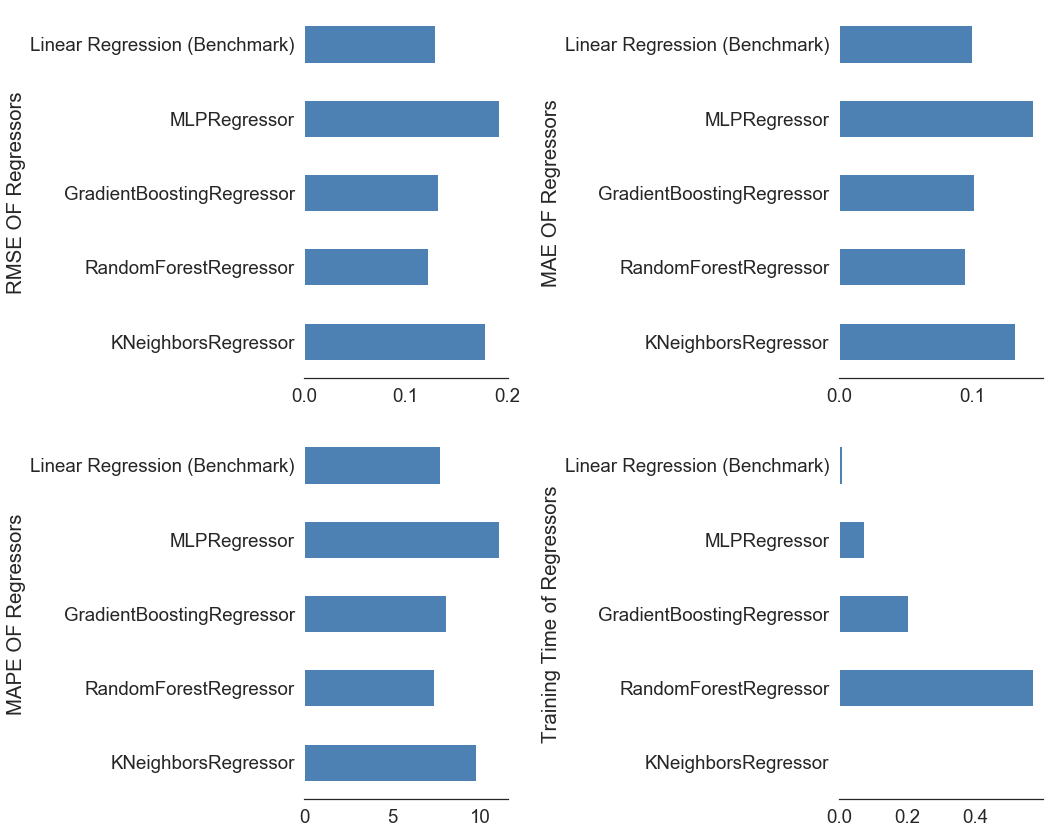

In [208]:
# Plot to compare thePerformance of Algorithms
sns.set_context("notebook", font_scale=1.7)
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.ylabel("RMSE OF Regressors")
properties["RMSE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()


plt.subplot(2,2,2)
plt.ylabel("MAE OF Regressors")
properties["MAE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,3)
plt.ylabel("MAPE OF Regressors")
properties["MAPE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,4)
plt.ylabel("Training Time of Regressors")
properties["Training Times"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

/Users/zmy/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  


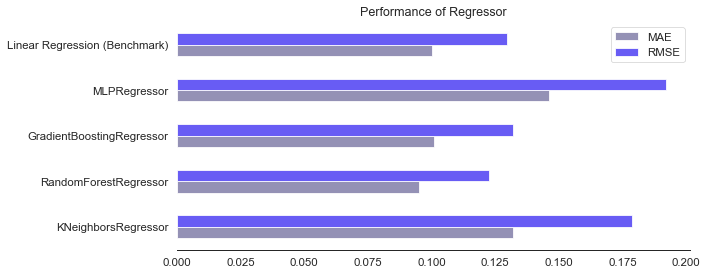

In [209]:
# Plot to compare the performance of Models on both datasets
sns.set_style('white')
sns.set_context("paper", font_scale=1.3)  

ax= properties[["MAE", "RMSE"]].plot(kind="barh", color=['#9491B5', '#685CF4'], title="Performance of Regressor", figsize=(10, 4))
sns.despine(left=True);
plt.tight_layout() 
plt.savefig('book1.png', dpi=300, frameon=False) 
plt.show()

### 4.4 random forest

In [210]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train.values.ravel())
rf.score(X_train, y_train)

0.9326090118441159

In [211]:
rf.score(X_test, y_test)

0.6365130694707087

#### 4.4.1 Optimise hyperparameters of the ML model

In [212]:
# number of trees to tune
no_trees = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,70,100,150,200,300]

# process of tune the number of trees
max_score = 0
best_no_trees = None
for t in no_trees:
    m = RandomForestRegressor(n_estimators=t).fit(X_train,y_train.values.ravel())
    score = m.score(X_test, y_test)
    if score > max_score:
        max_score = score
        best_no_trees = t

In [213]:
max_score

0.6746802079843663

In [214]:
best_no_trees

70

In [215]:
rf_final = RandomForestRegressor(n_estimators=best_no_trees)
rf_final.fit(X_train, y_train.values.ravel())

RandomForestRegressor(n_estimators=70)

In [216]:
print('The score on the training data:')
print(rf_final.score(X_train, y_train))
print('The score on the development data:')
print(rf_final.score(X_test, y_test))

The score on the training data:
0.934911238817052
The score on the development data:
0.6395982399097899


In [217]:
#best_model = rf_final.best_estimator_
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_final.predict(X_test)))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test, rf_final.predict(X_test))))
print('Mean Absolute Percentage Error:',MAPError(y_test, rf_final.predict(X_test)))

Mean Absolute Error: 0.09418721104114378
Mean Squared Error: 0.12136102600714736
Mean Absolute Percentage Error: 7.303954618967847


#### 4.4.2 Cross-validation

In [218]:
from sklearn import model_selection

# values of n_estimators
parameters = {'n_estimators':[10,20,30,40,50,70,100,150,200]}
rf = RandomForestRegressor()

clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(X_train, y_train.values.ravel())

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'n_estimators': 100}
The best score is: 
0.3069124514929508


In [219]:
n_estimators_range = [10,20,30,40,50,70,100,150,200]

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train.values.ravel(), 
                                              param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv=5)

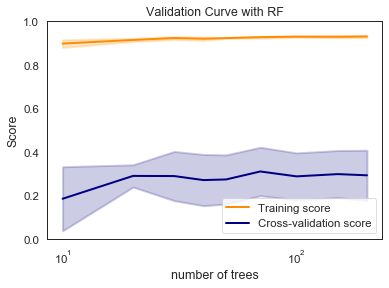

In [220]:
# plotting the validation curve
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.0, 1.0)
lw = 2
plt.semilogx(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [221]:
rf_final.score(X_test, y_test.values.ravel())

0.6395982399097899

In [222]:
# Find the index of most and least important feature and display that column
print("Most important feature = {}".format(X_train.columns[np.argmax(rf_final.feature_importances_)]))
print("Least important feature = {}".format(X_train.columns[np.argmin(rf_final.feature_importances_)]))

# Get the indices based on feature importance in ascending order 
feature_indices = np.argsort(rf_final.feature_importances_)

Most important feature = T_1
Least important feature = T_3


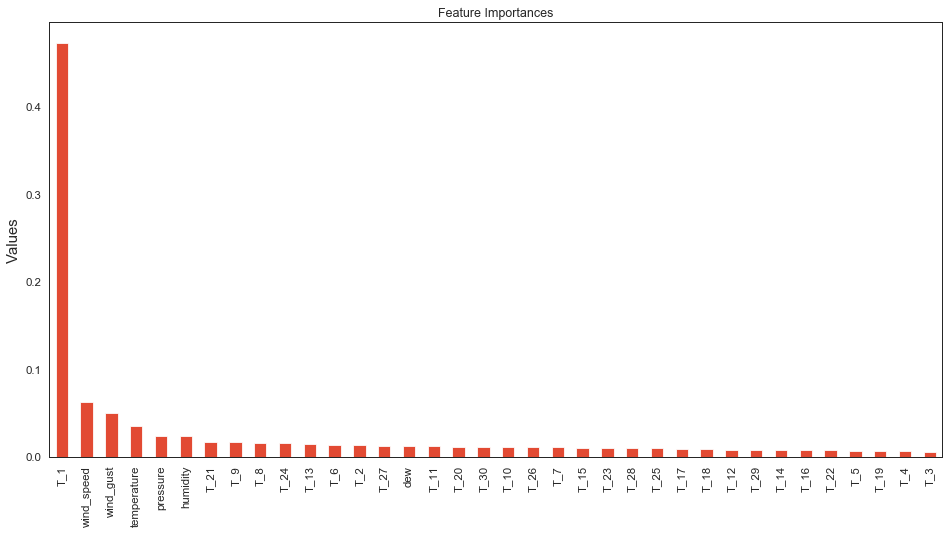

In [223]:
# Plot feature importance
fi = pd.DataFrame(index=X_train.columns[feature_indices], data=np.sort(rf_final.feature_importances_))
fi.sort_values(by=0, ascending=False)
fi.head()
# Plot feature importance
fi = pd.DataFrame(index=X_train.columns[feature_indices], data=np.sort(rf_final.feature_importances_))
fi.sort_values(by=0, ascending=False, inplace=True)
ax = fi.plot(kind="bar", title="Feature Importances", figsize=(16, 8))
ax.set_ylabel("Values", fontsize="large")
ax.legend_.remove()

## LSTM

In [256]:
dataset = df_lock_metrix.loc[:,['pm25']]

In [257]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 367 to 940
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm25    494 non-null    float64
dtypes: float64(1)
memory usage: 7.7 KB


In [258]:
dataset = dataset.values 
dataset = dataset.astype('float32')

In [259]:
dataset.shape

(494, 1)

In [260]:
np.random.seed(7)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [261]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

395 99


In [262]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [263]:
# reshape into X=t and Y=t+1
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [264]:
trainX.shape

(364, 30)

In [265]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [266]:
from keras.callbacks import EarlyStopping
import time

In [267]:
# create and fit the LSTM network
model = Sequential() # New Instance of Model Object
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(100, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='ADAM')

start = time.time()
hist =model.fit(trainX, trainY, epochs=150, shuffle=True,batch_size=125, validation_data=(testX, testY), 
                callbacks=[EarlyStopping(monitor='val_loss', patience=30)], verbose=1)

end = time.time()
# Training Phase
model.summary()

Epoch 1/150
3/3 [==============================] - 3s 341ms/step - loss: 0.2066 - val_loss: 0.1548
Epoch 2/150
3/3 [==============================] - 0s 14ms/step - loss: 0.1520 - val_loss: 0.1075
Epoch 3/150
3/3 [==============================] - 0s 12ms/step - loss: 0.1047 - val_loss: 0.0644
Epoch 4/150
3/3 [==============================] - 0s 11ms/step - loss: 0.0657 - val_loss: 0.0324
Epoch 5/150
3/3 [==============================] - 0s 11ms/step - loss: 0.0410 - val_loss: 0.0261
Epoch 6/150
3/3 [==============================] - 0s 12ms/step - loss: 0.0447 - val_loss: 0.0325
Epoch 7/150
3/3 [==============================] - 0s 12ms/step - loss: 0.0511 - val_loss: 0.0282
Epoch 8/150
3/3 [==============================] - 0s 13ms/step - loss: 0.0457 - val_loss: 0.0235
Epoch 9/150
3/3 [==============================] - 0s 13ms/step - loss: 0.0367 - val_loss: 0.0245
Epoch 10/150
3/3 [==============================] - 0s 13ms/step - loss: 0.0394 - val_loss: 0.0270
Epoch 11/150
3/3 [

In [268]:
b=testY[:96]
b.shape

(68,)

In [269]:
print ("Model took %0.2f seconds to train"%(end - start))

Model took 5.68 seconds to train


In [270]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [271]:
logger=keras.callbacks.TensorBoard(log_dir='logs', write_graph=True)

In [272]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [273]:
from sklearn.metrics import mean_absolute_error

In [274]:
print('Mean Absolute Error Train:', mean_absolute_error(trainY[0], trainPredict[:,0]))
print('Mean Squared Error Train:',np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])))
print('Mean Absolute Percentage Error:',MAPError(trainY[0], trainPredict[:,0]))


print('Mean Absolute Error Test:', mean_absolute_error(testY[0], testPredict[:,0]))
print('Mean Squared Error Test:',np.sqrt(mean_squared_error(testY[0], testPredict[:,0])))
print('Mean Absolute Percentage Error:',MAPError(testY[0], testPredict[:,0]))

Mean Absolute Error Train: 0.21331714261517434
Mean Squared Error Train: 0.267964284959511
Mean Absolute Percentage Error: 5.984708764566998
Mean Absolute Error Test: 0.2078041782672529
Mean Squared Error Test: 0.26429339359208476
Mean Absolute Percentage Error: 5.78250294990102


In [275]:
type(hist.history['loss'])

list

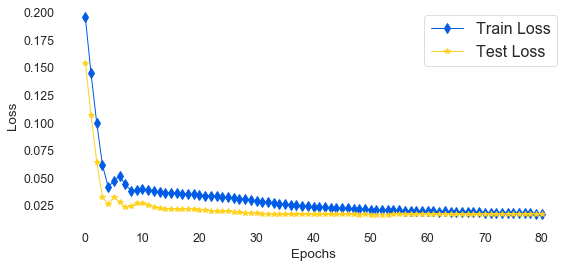

In [281]:

sns.set_style('white')
sns.set_context("paper", font_scale=1.4)  
plt.figure(figsize=(9,4))
import matplotlib as mpl
#mpl.rcParams['legend.frameon'] = 'True'
plt.plot(hist.history['loss'], color='#005ce6', linewidth=1, marker='d', markersize=7, label='Train Loss')
plt.plot(hist.history['val_loss'], color='#ffd11a',linewidth=1, marker='*',markersize=6, label='Test Loss')
plt.tick_params(left=False, labelleft=True) #remove ticks
plt.box(False)
plt.xlabel('Epochs')
plt.ylabel('Loss')
legend = plt.legend(loc='upper right',prop={'size': 16})
#legend.get_frame().set_facecolor('#8c8c8c')
plt.savefig('Fig15.4.png', dpi=400)

In [277]:
trainPredict1=pd.DataFrame(trainPredict)
trainY1=pd.DataFrame(trainY)
trainY1=trainY1.transpose()

testPredict1=pd.DataFrame(testPredict)
testY1=pd.DataFrame(testY)
testY1=testY1.transpose()

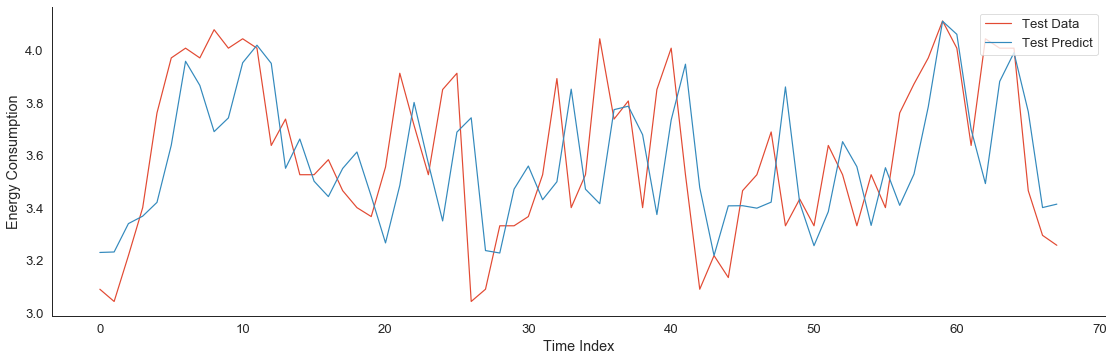

In [278]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.5)  
plt.figure(figsize=(16,5))
plt.plot(testY1[:720], label = "Test Data")
plt.plot(testPredict1[:720], label = "Test Predict")
plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.xlabel('Time Index')
plt.ylabel('Energy Consumption')
plt.legend(loc='upper right');
plt.savefig('Fig8.png', dpi=500)

/Users/zmy/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<Figure size 432x288 with 0 Axes>

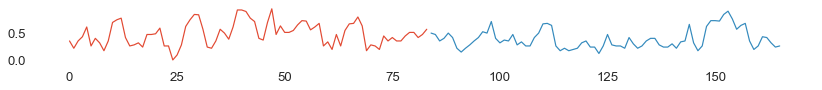

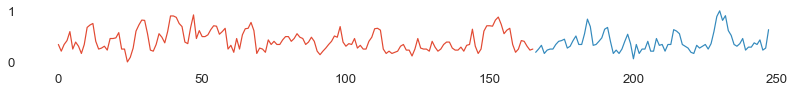

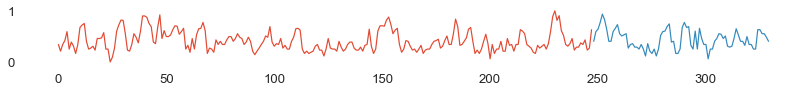

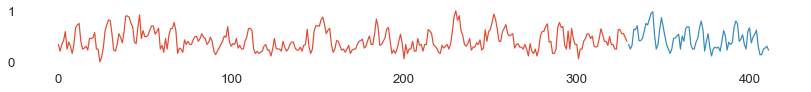

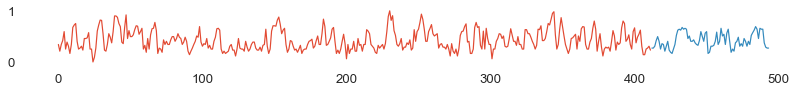

In [279]:
from sklearn.model_selection import TimeSeriesSplit
splits = TimeSeriesSplit(n_splits=5)
plt.figure(1)

index = 1
for train_index, test_index in splits.split(dataset):
	train = dataset[train_index]
	test = dataset[test_index]
	#print('Observations: %d' % (len(train) + len(test)))
	#print('Training Observations: %d' % (len(train)))
	#print('Testing Observations: %d' % (len(test)))
	plt.figure(figsize=(14,6))  
	sns.set_style('white')
	sns.set_context("paper", font_scale=1.5)  
    
    
	plt.subplot(510 + index)
	plt.plot(train)
	plt.plot([None for i in train] + [x for x in test])
	index += 1
	plt.xlabel('')
	plt.tick_params(left=False, labelleft=True) #remove ticks
	plt.box(False)
plt.show();

In [280]:
dataset1=dataset[:447]

In [120]:
dataset1.shape

(447, 1)

In [121]:
# split into train and test sets
train_size = int(len(dataset1) * 0.83)
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset),:]
print(len(train), len(test))

371 76


In [122]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [123]:
# reshape into X=t and Y=t+1
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


from keras.callbacks import EarlyStopping
import time


# create and fit the LSTM network
model = Sequential() # New Instance of Model Object
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(100, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='ADAM')

start = time.time()
hist =model.fit(trainX, trainY, epochs=180, shuffle=True,batch_size=125, validation_data=(testX, testY), 
                callbacks=[EarlyStopping(monitor='val_loss', patience=30)], verbose=1)

end = time.time()
# Training Phase
model.summary()

print ("Model took %0.2f seconds to train"%(end - start))

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
print('Mean Absolute Error Train:', mean_absolute_error(trainY[0], trainPredict[:,0]))
print('Mean Squared Error Train:',np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])))
#print('Mean Absolute Percentage Error:',MAPError(trainY[0], trainPredict[:,0]))


print('Mean Absolute Error Test:', mean_absolute_error(testY[0], testPredict[:,0]))
print('Mean Squared Error Test:',np.sqrt(mean_squared_error(testY[0], testPredict[:,0])))
#print('Mean Absolute Percentage Error:',MAPError(testY[0], testPredict[:,0]))

Epoch 1/180
3/3 [==============================] - 4s 348ms/step - loss: 0.2150 - val_loss: 0.1243
Epoch 2/180
3/3 [==============================] - 0s 10ms/step - loss: 0.1456 - val_loss: 0.0749
Epoch 3/180
3/3 [==============================] - 0s 10ms/step - loss: 0.0872 - val_loss: 0.0376
Epoch 4/180
3/3 [==============================] - 0s 13ms/step - loss: 0.0506 - val_loss: 0.0264
Epoch 5/180
3/3 [==============================] - 0s 11ms/step - loss: 0.0397 - val_loss: 0.0428
Epoch 6/180
3/3 [==============================] - 0s 13ms/step - loss: 0.0508 - val_loss: 0.0443
Epoch 7/180
3/3 [==============================] - 0s 15ms/step - loss: 0.0464 - val_loss: 0.0314
Epoch 8/180
3/3 [==============================] - 0s 19ms/step - loss: 0.0371 - val_loss: 0.0248
Epoch 9/180
3/3 [==============================] - 0s 15ms/step - loss: 0.0357 - val_loss: 0.0246
Epoch 10/180
3/3 [==============================] - 0s 15ms/step - loss: 0.0399 - val_loss: 0.0249
Epoch 11/180
3/3 [

## LSTM Mode

### building model function

In [ ]:
def make_forecasts(model, n_batch, train, test, n_lag, n_seq):
    forecasts = list()
    X = test[0, 0:n_lag]
    for i in range(len(test)):        
        X = X.reshape(1, 1, len(X))
        # make forecast
        forecast = model.predict(X, batch_size=n_batch)[0, 0]
        X = np.array([forecast])
        # store the forecast
        forecasts.append(forecast)
    return forecasts

In [224]:
def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=layers[2]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop",metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

def build_model2(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16,kernel_initializer='random_uniform',activation='relu'))        
        model.add(Dense(1,kernel_initializer='random_uniform',activation='relu'))
        model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
        return model

In [ ]:
def MODEL_LSTM(x_train,x_test,y_train,y_test,Num_Exp,Epochs,Hidden,batch_size,n_steps_in,n_steps_out):
        
    train_acc=np.zeros(Num_Exp)
    test_acc=np.zeros(Num_Exp)
    Step_RMSE=np.zeros([Num_Exp,n_steps_out])
    n_features = x_train.shape[-1]

    model = Sequential()
    model.add(LSTM(Hidden, activation='relu', input_shape=(n_steps_in,n_features), dropout=0.2))
    # model.add(Dense(16))
    model.add(Dense(n_steps_out))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    Best_RMSE=100000000   #Assigning a large number 
    
    start_time=time.time()
    for run in range(Num_Exp):
        print("Experiment",run+1,"in progress")
        # fit model
        history = model.fit(x_train, y_train, epochs=Epochs,batch_size=batch_size, verbose=0, shuffle=False)
        
        y_predicttrain = model.predict(x_train)
        y_predicttest = model.predict(x_test)
        train_acc[run] = rmse( y_predicttrain,y_train) 
        test_acc[run] = rmse( y_predicttest, y_test) 
        if test_acc[run]<Best_RMSE:
            Best_RMSE=test_acc[run]
            Best_Predict_Test=y_predicttest
        for j in range(n_steps_out):
            Step_RMSE[run][j]=rmse(y_predicttest[:,j], y_test[:,j])
            
    print("Total time for",Num_Exp,"experiments",time.time()-start_time)
    return train_acc,test_acc,Step_RMSE,Best_Predict_Test

### Loading the model sequence structure

### split data 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [68]:
def generate_data(df_train,df_test,n_steps_in,n_steps_out):

    x_train = []
    y_train = []        
    x_test = []
    y_test = []
    n_features = 1              
    for i in range(len(df_train.index)):
        x_train.append(df_train.iloc[i,1:n_steps_in+1])
        y_train.append(df_train.iloc[i,n_steps_in+1:n_steps_in+1+n_steps_out])

    for i in range(len(df_test.index)):
        x_test.append(df_test.iloc[i,1:n_steps_in+1])
        y_test.append(df_test.iloc[i,n_steps_in+1:n_steps_in+1+n_steps_out])    

    x_train = np.array(x_train)
    x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],n_features)
    y_train = np.array(y_train)

    x_test = np.array(x_test)
    x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],n_features)
    y_test = np.array(y_test)

    return x_train,x_test,y_train,y_test

In [69]:
def processing_data(dfx,dfy,dfz,dfw,dfx0,dfy0,dfz0,dfw0,n_steps_in,n_steps_out):
    x_train = []
    y_train = []        
    x_test = []
    y_test = []  

    x_train1,x_test1,y_train1,y_test1 = generate_data(dfx,dfx0,n_steps_in,n_steps_out)
    x_train2,x_test2,y_train2,y_test2 = generate_data(dfy,dfy0,n_steps_in,n_steps_out)
    x_train3,x_test3,y_train3,y_test3 = generate_data(dfz,dfz0,n_steps_in,n_steps_out)
    x_train4,x_test4,y_train4,y_test4 = generate_data(dfw,dfw0,n_steps_in,n_steps_out)
    
    print(len(x_train1))
    # print(x_train1)
    print(len(x_train4))
    # print(x_train4)
    x_train = np.concatenate((x_train1,x_train2,x_train3,x_train4),axis=2)
    x_test = np.concatenate((x_test1,x_test2,x_test3,x_test4),axis=2)
    y_train = y_train1
    y_test = y_test1

    return x_train,x_test,y_train,y_test

## plot

Text(0, 0.5, 'PM25')

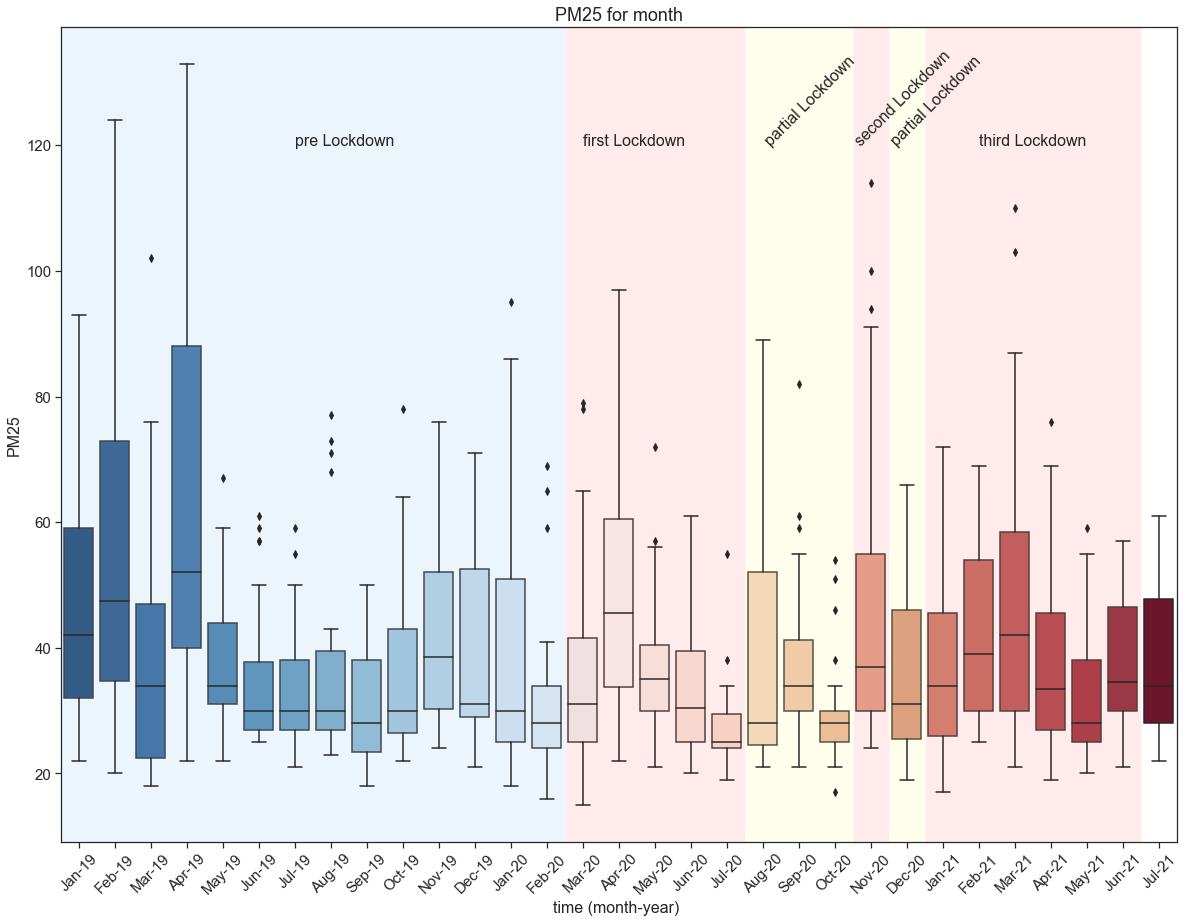

In [106]:
f,ax = plt.subplots(1,1, figsize=(20,15))
sns.set_theme(style="ticks", palette="pastel")

plt.axvspan(-0.5, 13.5, facecolor='b', alpha=0.2)
plt.axvspan(13.5, 18.5, facecolor='r', alpha=0.2)
plt.axvspan(18.5, 21.5, facecolor='y', alpha=0.2)
plt.axvspan(21.5, 22.5, facecolor='r', alpha=0.2)
plt.axvspan(22.5, 23.5, facecolor='y', alpha=0.2)
plt.axvspan(23.5, 29.5, facecolor='r', alpha=0.2)

plt.xticks(rotation=45,fontsize = 15)
plt.yticks(fontsize = 15)

plt.text(x=6,y=120,s='pre Lockdown',fontsize=16)
plt.text(x=14,y=120,s='first Lockdown',fontsize=16)
plt.text(x=19,y=120,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=21.5,y=120,s='second Lockdown',fontsize=16,rotation=45)
plt.text(x=22.5,y=120,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=25,y=120,s='third Lockdown',fontsize=16)


sns.boxplot(x="year_month", y="pm25",data=df,palette="RdBu_r",ax=ax)
ax.set_title('PM25 for month',fontsize=18)
ax.set_xlabel("time (month-year) ",fontsize=16)
ax.set_ylabel("PM25",fontsize=16)


Text(0, 0.5, 'PM10')

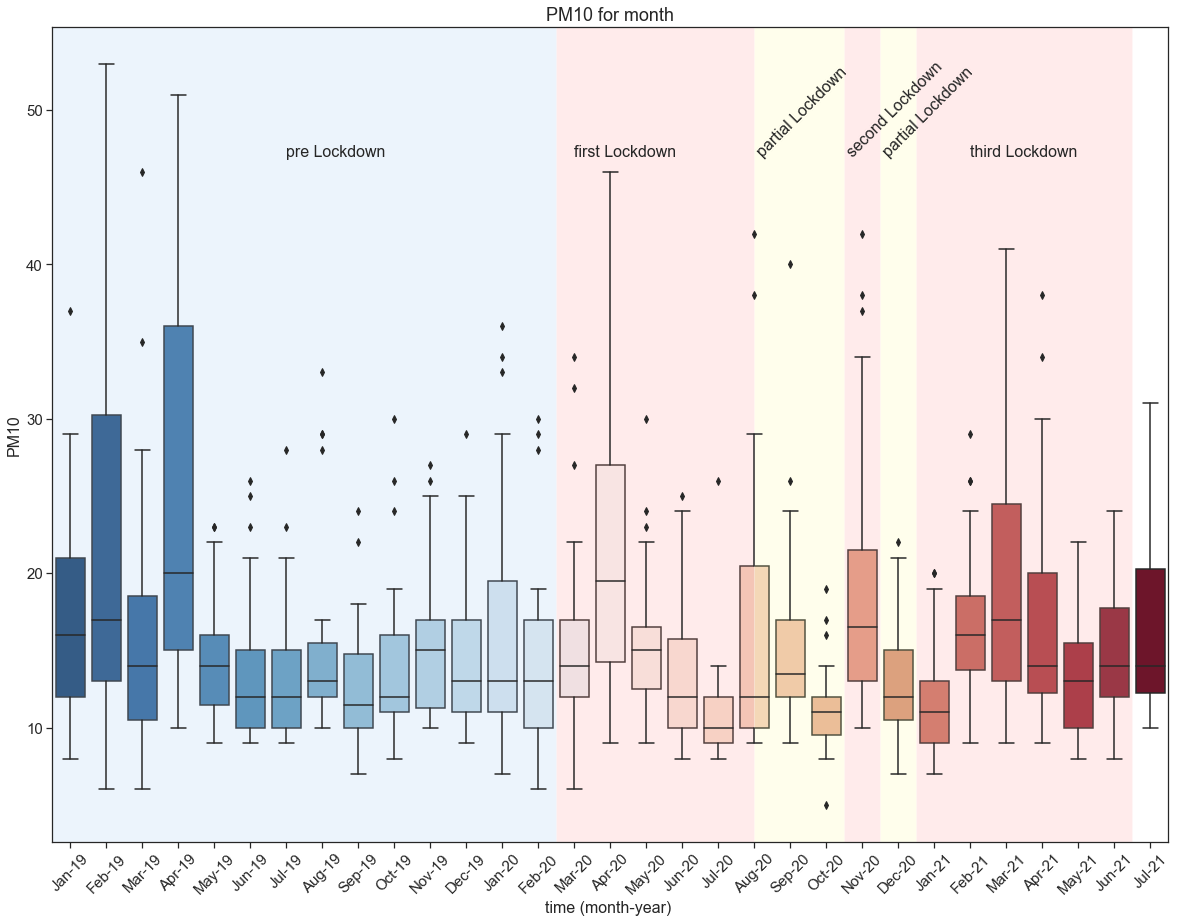

In [223]:
f,ax = plt.subplots(1,1, figsize=(20,15))
sns.set_theme(style="ticks", palette="pastel")

plt.axvspan(-0.5, 13.5, facecolor='b', alpha=0.2)
plt.axvspan(13.5, 19, facecolor='r', alpha=0.2)
plt.axvspan(19, 21.5, facecolor='y', alpha=0.2)
plt.axvspan(21.5, 22.5, facecolor='r', alpha=0.2)
plt.axvspan(22.5, 23.5, facecolor='y', alpha=0.2)
plt.axvspan(23.5, 29.5, facecolor='r', alpha=0.2)

plt.xticks(rotation=45,fontsize = 15)
plt.yticks(fontsize = 15)

plt.text(x=6,y=47,s='pre Lockdown',fontsize=16)
plt.text(x=14,y=47,s='first Lockdown',fontsize=16)
plt.text(x=19,y=47,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=21.5,y=47,s='second Lockdown',fontsize=16,rotation=45)
plt.text(x=22.5,y=47,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=25,y=47,s='third Lockdown',fontsize=16)

sns.boxplot(x="year_month", y="pm10",data=df,palette="RdBu_r",ax=ax)
ax.set_title('PM10 for month',fontsize=18)
ax.set_xlabel("time (month-year) ",fontsize=16)
ax.set_ylabel("PM10",fontsize=16)

Text(0, 0.5, 'CO')

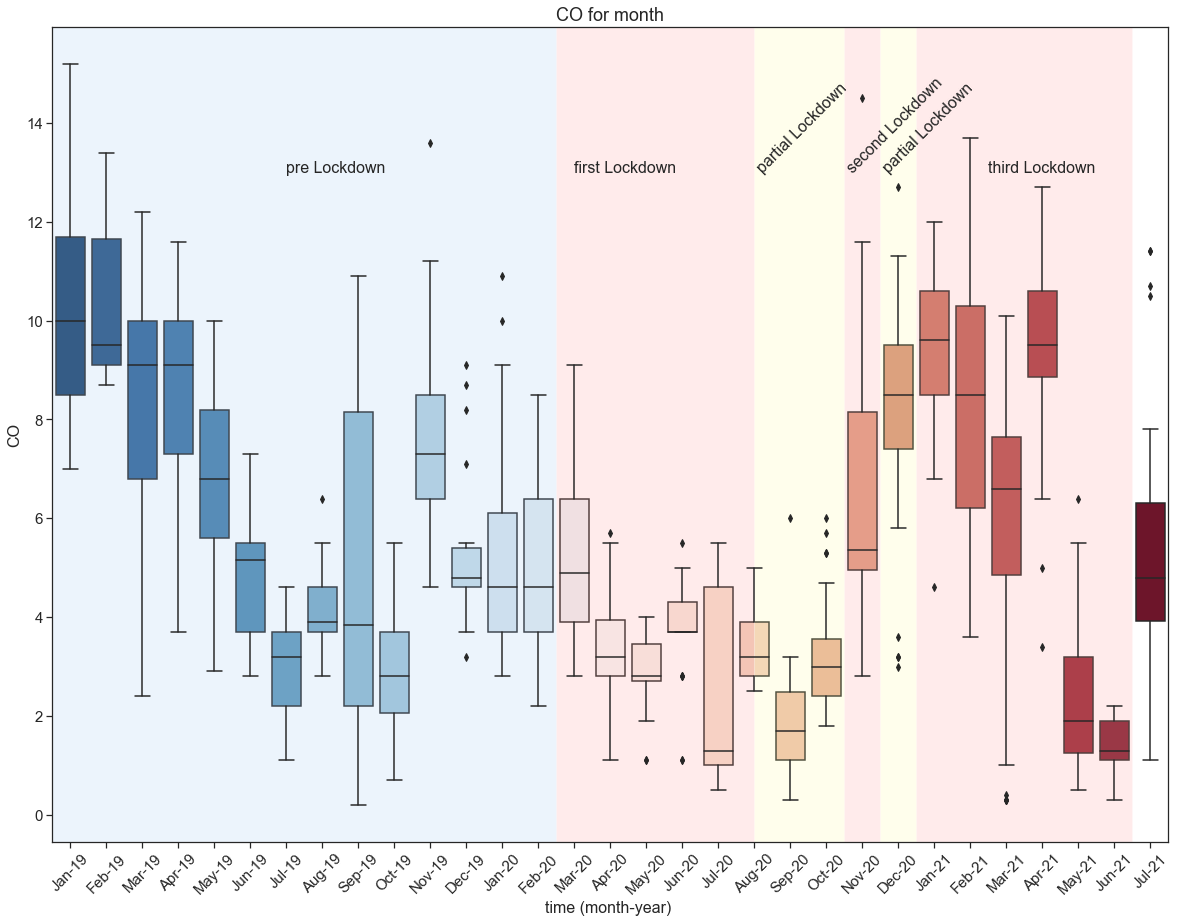

In [226]:
f,ax = plt.subplots(1,1, figsize=(20,15))
sns.set_theme(style="ticks", palette="pastel")

plt.axvspan(-0.5, 13.5, facecolor='b', alpha=0.2)
plt.axvspan(13.5, 19, facecolor='r', alpha=0.2)
plt.axvspan(19, 21.5, facecolor='y', alpha=0.2)
plt.axvspan(21.5, 22.5, facecolor='r', alpha=0.2)
plt.axvspan(22.5, 23.5, facecolor='y', alpha=0.2)
plt.axvspan(23.5, 29.5, facecolor='r', alpha=0.2)

plt.xticks(rotation=45,fontsize = 15)
plt.yticks(fontsize = 15)

plt.text(x=6,y=13,s='pre Lockdown',fontsize=16)
plt.text(x=14,y=13,s='first Lockdown',fontsize=16)
plt.text(x=19,y=13,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=21.5,y=13,s='second Lockdown',fontsize=16,rotation=45)
plt.text(x=22.5,y=13,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=25.5,y=13,s='third Lockdown',fontsize=16)

sns.boxplot(x="year_month", y="co",data=df,palette="RdBu_r",ax=ax)
ax.set_title('CO for month',fontsize=18)
ax.set_xlabel("time (month-year) ",fontsize=16)
ax.set_ylabel("CO",fontsize=16)

Text(0, 0.5, 'O3')

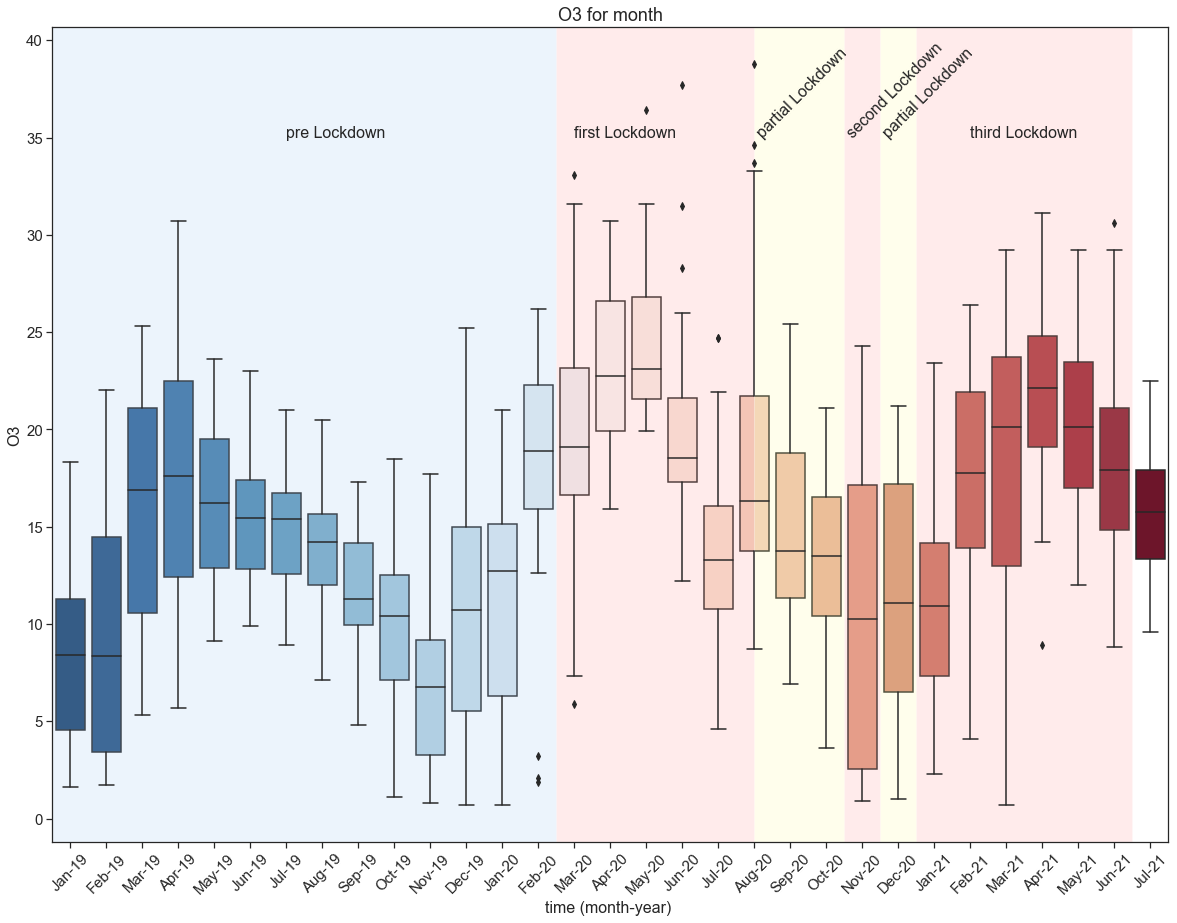

In [227]:
f,ax = plt.subplots(1,1, figsize=(20,15))
sns.set_theme(style="ticks", palette="pastel")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

plt.axvspan(-0.5, 13.5, facecolor='b', alpha=0.2)
plt.axvspan(13.5, 19, facecolor='r', alpha=0.2)
plt.axvspan(19, 21.5, facecolor='y', alpha=0.2)
plt.axvspan(21.5, 22.5, facecolor='r', alpha=0.2)
plt.axvspan(22.5, 23.5, facecolor='y', alpha=0.2)
plt.axvspan(23.5, 29.5, facecolor='r', alpha=0.2)

plt.xticks(rotation=45,fontsize = 15)
plt.yticks(fontsize = 15)

plt.text(x=6,y=35,s='pre Lockdown',fontsize=16)
plt.text(x=14,y=35,s='first Lockdown',fontsize=16)
plt.text(x=19,y=35,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=21.5,y=35,s='second Lockdown',fontsize=16,rotation=45)
plt.text(x=22.5,y=35,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=25,y=35,s='third Lockdown',fontsize=16)

sns.boxplot(x="year_month", y="o3",data=df,palette="RdBu_r",ax=ax)
ax.set_title('O3 for month',fontsize=18)
ax.set_xlabel("time (month-year) ",fontsize=16)
ax.set_ylabel("O3",fontsize=16)

Text(0, 0.5, 'SO2')

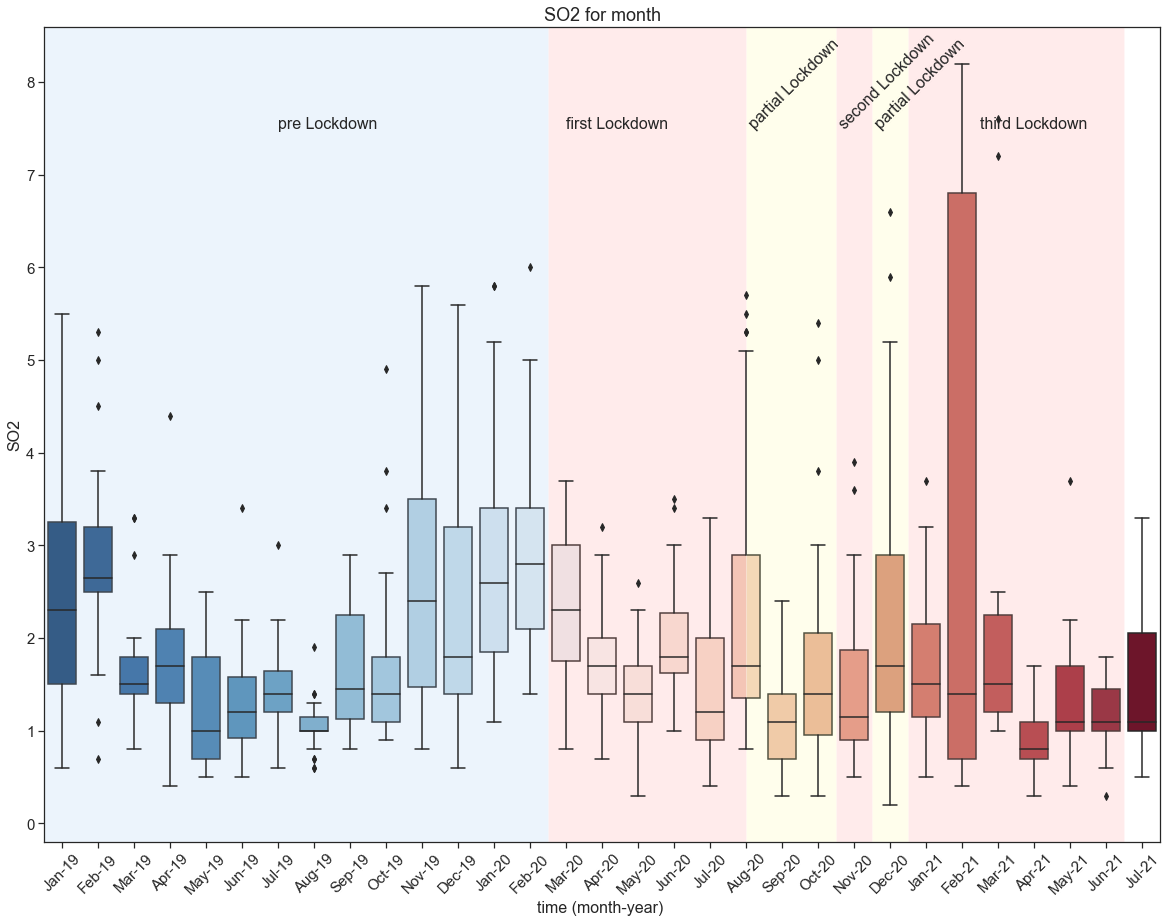

In [229]:
f,ax = plt.subplots(1,1, figsize=(20,15))
sns.set_theme(style="ticks", palette="pastel")

plt.axvspan(-0.5, 13.5, facecolor='b', alpha=0.2)
plt.axvspan(13.5, 19, facecolor='r', alpha=0.2)
plt.axvspan(19, 21.5, facecolor='y', alpha=0.2)
plt.axvspan(21.5, 22.5, facecolor='r', alpha=0.2)
plt.axvspan(22.5, 23.5, facecolor='y', alpha=0.2)
plt.axvspan(23.5, 29.5, facecolor='r', alpha=0.2)

plt.xticks(rotation=45,fontsize = 15)
plt.yticks(fontsize = 15)

plt.text(x=6,y=7.5,s='pre Lockdown',fontsize=16)
plt.text(x=14,y=7.5,s='first Lockdown',fontsize=16)
plt.text(x=19,y=7.5,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=21.5,y=7.5,s='second Lockdown',fontsize=16,rotation=45)
plt.text(x=22.5,y=7.5,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=25.5,y=7.5,s='third Lockdown',fontsize=16)

sns.boxplot(x="year_month", y="so2",data=df,palette="RdBu_r",ax=ax)
ax.set_title('SO2 for month',fontsize=18)
ax.set_xlabel("time (month-year) ",fontsize=16)
ax.set_ylabel("SO2",fontsize=16)

In [148]:
df.columns

Index(['Date', 'co', 'dew', 'humidity', 'no2', 'o3', 'pm10', 'pm25',
       'pressure', 'so2', 'temperature', 'wind-gust', 'wind-speed',
       'year_month', 'year', 'month', 'day'],
      dtype='object')

In [149]:
select= [x for x in ['co',  'no2', 'o3', 'pm10', 'pm25','so2',
       'pressure',  'temperature', 'wind-gust', 'wind-speed''dew', 'humidity',]]

Text(0, 0.5, 'NO2')

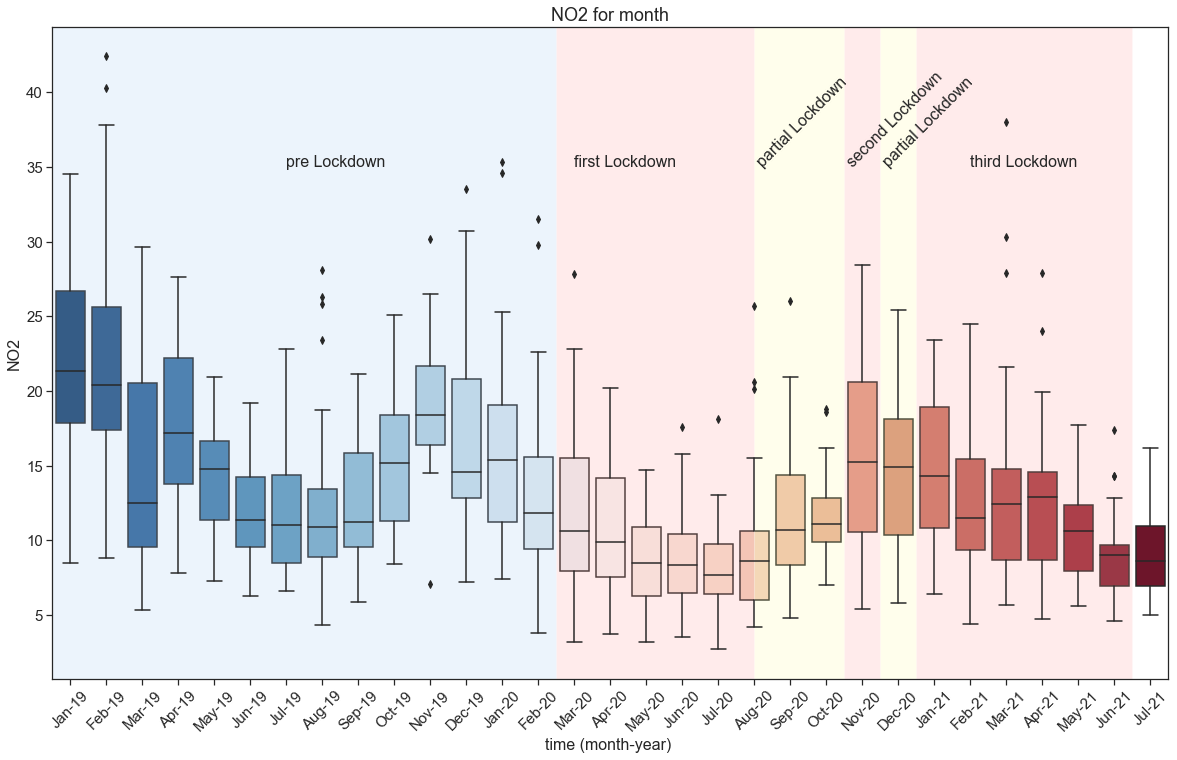

In [230]:
f,ax = plt.subplots(1,1, figsize=(20,12))
sns.set_theme(style="ticks", palette="pastel")

plt.axvspan(-0.5, 13.5, facecolor='b', alpha=0.2)
plt.axvspan(13.5, 19, facecolor='r', alpha=0.2)
plt.axvspan(19, 21.5, facecolor='y', alpha=0.2)
plt.axvspan(21.5, 22.5, facecolor='r', alpha=0.2)
plt.axvspan(22.5, 23.5, facecolor='y', alpha=0.2)
plt.axvspan(23.5, 29.5, facecolor='r', alpha=0.2)

plt.xticks(rotation=45,fontsize = 15)
plt.yticks(fontsize = 15)

plt.text(x=6,y=35,s='pre Lockdown',fontsize=16)
plt.text(x=14,y=35,s='first Lockdown',fontsize=16)
plt.text(x=19,y=35,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=21.5,y=35,s='second Lockdown',fontsize=16,rotation=45)
plt.text(x=22.5,y=35,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=25,y=35,s='third Lockdown',fontsize=16)

sns.boxplot(x="year_month", y="no2",data=df,palette="RdBu_r",ax=ax)
ax.set_title('NO2 for month',fontsize=18)
ax.set_xlabel("time (month-year) ",fontsize=16)
ax.set_ylabel("NO2",fontsize=16)


Text(0.5, 1.0, 'Ratio of infected (%)')

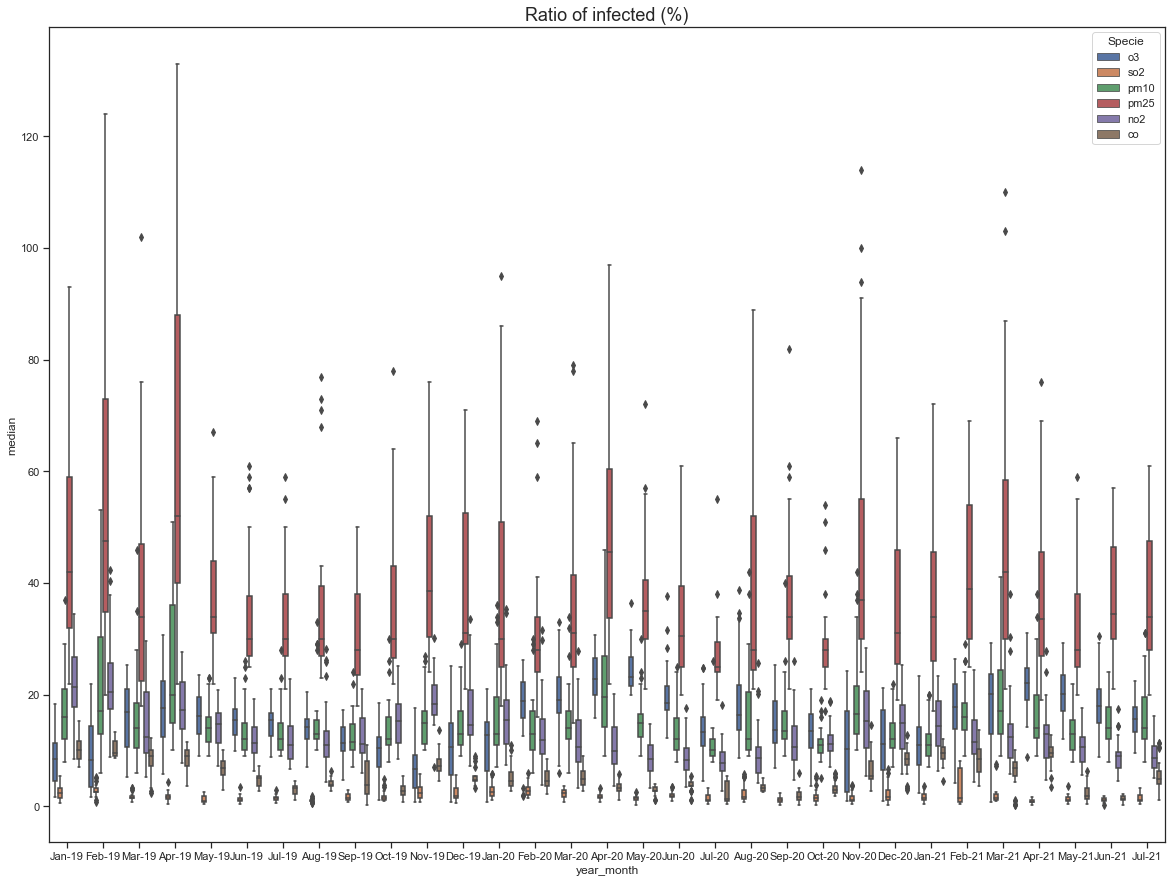

In [105]:
f,ax = plt.subplots(1,1, figsize=(20,15))
sns.set_theme(style="ticks", palette="pastel")


sns.boxplot(x="year_month", y="median", hue="Specie",data=df_list1, palette="Set3",ax = ax)
#ax.set_title('Ratio of infected (%)',fontsize=18)


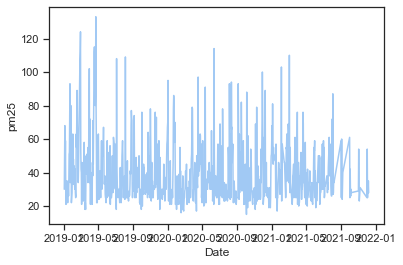

In [94]:
#f,ax = plt.subplots(1,1, figsize=(20,15))
sns.lineplot(data=df, x="Date", y="pm25")